In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from astropy.io import fits
import astropy.time as apTime

In [3]:
datafilename = '/home/scratch/mabitbol/3C245/OnOff/scan25.raw.vegas/scan25.raw.vegas.A.fits'

In [4]:
f = fits.open(datafilename)

In [5]:
hdu = f[1]

In [7]:
hdu.data['TIMESTAMP']

chararray(['2017_04_03_01:01:52', '2017_04_03_01:01:52', '2017_04_03_01:01:52',
       ..., '2017_04_03_01:01:52', '2017_04_03_01:01:52',
       '2017_04_03_01:01:52'], 
      dtype='|S22')

In [6]:
data = hdu.data['DATA']

In [7]:
data.shape

(320544, 16384)

In [8]:
times = apTime.Time(hdu.data['DATE-OBS'],format='isot',scale='utc').jd

In [8]:
onsource = hdu.data['PROCSCAN'] == 'ON'

In [9]:
calon = hdu.data['CAL'] == 'T'

In [10]:
onsource & calon

array([False,  True, False, ..., False, False, False], dtype=bool)

In [11]:
onsource_oncal = data[onsource & calon, :]

In [12]:
onsource_oncal = onsource_oncal.reshape((-1, 4, 16384))

In [13]:
onsource_oncal.shape

(20034, 4, 16384)

In [29]:
onsource_offcal = data[onsource & ~calon, :]

In [32]:
onsource_offcal = onsource_offcal.reshape((-1, 4, 16384))

In [33]:
onsource_offcal.shape

(20034, 4, 16384)

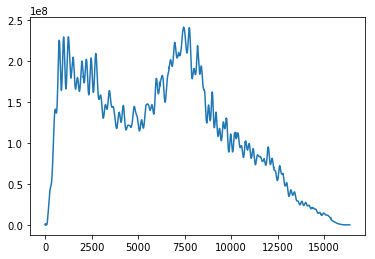

In [20]:
plot(np.nanmean(onsource_oncal[:,0,1:], 0))

/users/mabitbol/miniconda2/envs/gbt/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


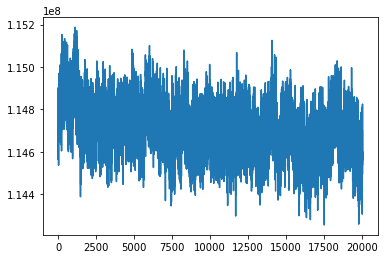

In [28]:
plot(np.nanmean(onsource_oncal[:,0,1:], 1))

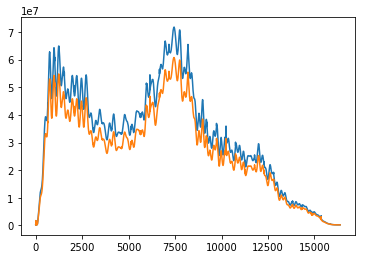

In [38]:
plot(np.nanmean(onsource_offcal[:,0,1:], 0))
plot(np.nanmean(offsource_offcal[:,0,1:], 0))

In [39]:
onsource_offcal_timeavg = np.nanmean(onsource_offcal[:,0,1:], 0)

In [40]:
offsource_offcal_timeavg = np.nanmean(offsource_offcal[:,0,1:], 0)

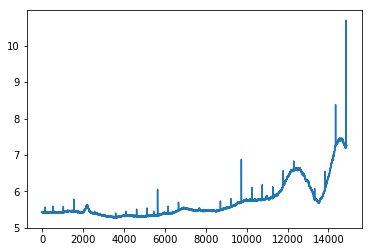

In [48]:
plot((offsource_offcal_timeavg / (onsource_offcal_timeavg - offsource_offcal_timeavg))[500:-1000])

In [49]:
onsource_oncal_timeavg = np.nanmean(onsource_oncal[:,0,1:], 0)

In [50]:
offsource_oncal_timeavg = np.nanmean(offsource_oncal[:,0,1:], 0)

In [51]:
hdu.data['TCAL']

array([ 64.29480743,  64.29480743,  58.51227188, ...,  64.29480743,
        64.29480743,  64.29480743], dtype=float32)

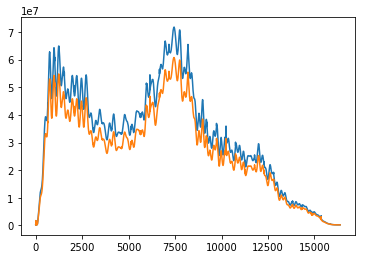

In [38]:
plot(np.nanmean(onsource_offcal[:,0,1:], 0))
plot(np.nanmean(offsource_offcal[:,0,1:], 0))

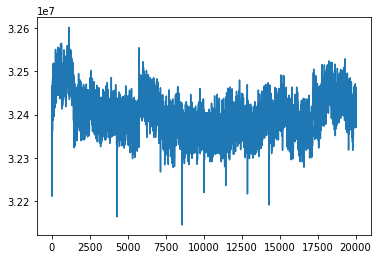

In [35]:
plot(np.nanmean(onsource_offcal[:,0,1:], 1))

In [36]:
offsource_oncal = data[~onsource & calon, :]
offsource_oncal = offsource_oncal.reshape((-1, 4, 16384))

In [37]:
offsource_offcal = data[~onsource & ~calon, :]
offsource_offcal = offsource_offcal.reshape((-1, 4, 16384))

In [ ]:
calon_onsource = data[calon[onsource_index], :]

/users/mabitbol/miniconda2/envs/gbt/lib/python2.7/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 320544 but corresponding boolean dimension is 160272
  if __name__ == '__main__':


In [49]:
onsource_data = data[onsource_index, :]

In [56]:
print onsource_data.shape

(160272, 16384)


In [55]:
onsource_data = onsource_data.reshape((-1,16384))

In [ ]:
oncal_onsource = onsource_data[calon, :]

/users/mabitbol/miniconda2/envs/gbt/lib/python2.7/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 160272 but corresponding boolean dimension is 320544
  if __name__ == '__main__':


In [54]:
hdu.data['CAL'].shape

(320544,)

In [ ]:
offsource_data = data[~onsource_index, :]

In [43]:
hdu.data['PROCSCAN'].shape

(320544,)

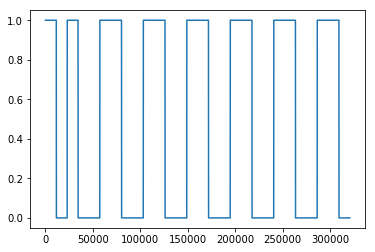

In [16]:
plot(hdu.data['PROCSCAN']=='ON')